In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install statsmodels
#import statsmodels.api as sm
import scipy
#import joypy
from matplotlib import cm
from sklearn.datasets import load_iris
import scipy.stats
from scipy.stats import ttest_ind
#%load_ext lab_black
#pd.set_option("max_columns", 500)

In [2]:
ypd_df = pd.read_csv('/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/wt/ypd/multiExp_AllPos_acdc_output__wt_ypd_all.csv')
new_ypd_df = pd.read_csv('/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/wt/ypd/170524/multiExp_AllPos_acdc_output_new.csv')
ypd_45_df = pd.read_csv('/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/wt/ypd/230524/multiExp_AllPos_acdc_output_ypd_rep45.csv')

In [4]:
mrx6_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/mrx6/multiExp_AllPos_acdc_output_all_correct_new.csv")

In [5]:
dnm1_45_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/dnm1/all_replicates/240524/multiExp_AllPos_acdc_output_dnm1_rep45.csv")
mrx6_45_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/mrx6/230524/multiExp_AllPos_acdc_output_mrx6_rep45.csv")

In [7]:
dnm1_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/dnm1/all_replicates/multiExp_AllPos_acdc_output_all_dnm1_correct_new.csv")
dnm1_df

,experiment_folderpath,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,cell_cycle_stage,generation_num,...,BF_mean_proj_dataPrepBkgr_bkgrVal_median,BF_mean_proj_dataPrepBkgr_bkgrVal_mean,BF_mean_proj_dataPrepBkgr_bkgrVal_q75,BF_mean_proj_dataPrepBkgr_bkgrVal_q25,BF_mean_proj_dataPrepBkgr_bkgrVal_q95,BF_mean_proj_dataPrepBkgr_bkgrVal_q05,cell_area_pxl,cell_vol_vox,cell_area_um2,cell_vol_fl
0,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,dnm1_from_ypg_well2,Position_1,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2846.0,101094.726562,34.4366,134.557081
1,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,dnm1_from_ypg_well2,Position_1,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2731.0,97375.875000,33.0451,129.607290
2,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,dnm1_from_ypg_well2,Position_1,3,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1221.0,30931.974609,14.7741,41.170458
3,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,dnm1_from_ypg_well2,Position_1,5,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2032.0,55748.105469,24.5872,74.200728
4,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,dnm1_from_ypg_well2,Position_2,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1674.0,44904.757812,20.2554,59.768233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_dnm1_well5,Position_11,12,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3144.0,102059.703125,3144.0000,102059.703125
1067,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_dnm1_well5,Position_11,14,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1898.0,53810.406250,1898.0000,53810.406250
1068,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_dnm1_well5,Position_11,15,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3863.0,131968.015625,3863.0000,131968.015625
1069,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_dnm1_well5,Position_11,17,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2212.0,70675.281250,2212.0000,70675.281250


In [9]:
ypg_wt_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/wt/ypg/multiExp_AllPos_acdc_output_all_ypg.csv")
ypg_wt_df['frame_i'] = 0
ypg_wt_df

,experiment_folderpath,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,cell_cycle_stage,generation_num,...,BF_mean_proj_dataPrepBkgr_bkgrVal_median,BF_mean_proj_dataPrepBkgr_bkgrVal_mean,BF_mean_proj_dataPrepBkgr_bkgrVal_q75,BF_mean_proj_dataPrepBkgr_bkgrVal_q25,BF_mean_proj_dataPrepBkgr_bkgrVal_q95,BF_mean_proj_dataPrepBkgr_bkgrVal_q05,cell_area_pxl,cell_vol_vox,cell_area_um2,cell_vol_fl
0,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2291.0,73020.101562,27.7211,97.189755
1,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2225.0,74313.468750,26.9225,98.911227
2,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,3,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2542.0,85327.421875,30.7582,113.570799
3,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,4,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3567.0,136469.843750,43.1607,181.641362
4,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,5,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2051.0,62600.253906,24.8171,83.320938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_ypg_well4,Position_8,15,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2636.0,92208.765625,2636.0000,92208.765625
1872,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_ypg_well4,Position_8,16,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3271.0,111588.984375,3271.0000,111588.984375
1873,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_ypg_well4,Position_8,17,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1514.0,42988.242188,1514.0000,42988.242188
1874,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_ypg_well4,Position_8,18,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2888.0,105738.046875,2888.0000,105738.046875


In [10]:
ypg_wt_45_df = pd.read_csv("/volumes/roussou/Microscopy/18well_ibidi_18hrs_heteroplasmy/wt/ypg/240524/multiExp_AllPos_acdc_output_ypg_rep45.csv")

In [11]:
ypg_wt_df = pd.concat([ypg_wt_df, ypg_wt_45_df], ignore_index=False)
dnm1_df = pd.concat([dnm1_45_df, dnm1_df], ignore_index=False)
mrx6_df = pd.concat([mrx6_45_df, mrx6_df], ignore_index=False)
ypd_wt_df = pd.concat([ypd_df, ypd_45_df, new_ypd_df], ignore_index=False)
ypg_wt_df

,experiment_folderpath,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,cell_cycle_stage,generation_num,...,BF_mean_proj_dataPrepBkgr_bkgrVal_q25,BF_mean_proj_dataPrepBkgr_bkgrVal_q95,BF_mean_proj_dataPrepBkgr_bkgrVal_q05,cell_area_pxl,cell_vol_vox,cell_area_um2,cell_vol_fl,mKate_mean_proj_CV,BF_mean_proj_CV,NG_mean_proj_CV
0,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,2291.0,73020.101562,27.7211,97.189755,NaN,NaN,NaN
1,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,2225.0,74313.468750,26.9225,98.911227,NaN,NaN,NaN
2,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,3,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,2542.0,85327.421875,30.7582,113.570799,NaN,NaN,NaN
3,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,4,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,3567.0,136469.843750,43.1607,181.641362,NaN,NaN,NaN
4,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_from_ypg_well1,Position_1,5,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,2051.0,62600.253906,24.8171,83.320938,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_ypg_well6,Position_8,13,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,550.0,8835.610352,550.0000,8835.610352,0.085906,0.107578,0.009665
1678,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_ypg_well6,Position_8,14,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,3954.0,162702.625000,3954.0000,162702.625000,0.152711,0.188220,0.010979
1679,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_ypg_well6,Position_8,15,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,2803.0,109355.187500,2803.0000,109355.187500,0.122340,0.155109,0.010789
1680,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,wt_ypg_well6,Position_8,16,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,3926.0,160208.468750,3926.0000,160208.468750,0.093902,0.131625,0.010332


In [12]:
def create_replicate_column(df, path_column):

    def extract_replicate_date(path):
        parts = path.split('/')
        if len(parts) > 2:
            return parts[-2]  # This gives the second last part
        else:
            return None
    
    def ordinal(n):
        """Convert an integer into its ordinal representation."""
        if 10 <= n % 100 <= 20:
            suffix = 'th'
        else:
            suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
        return f"{n}{suffix}"

    # Extract replicate_date
    df['replicate_date'] = df[path_column].apply(extract_replicate_date)
    
    # Get unique replicate_date values in the order they appear and create the conditions_values_dict
    unique_values = df['replicate_date'].unique()
    conditions_values_dict = {value: ordinal(i + 1) for i, value in enumerate(unique_values)}
    
    # Create the replicate column based on the dictionary
    df['replicate'] = df['replicate_date'].map(conditions_values_dict)
    
    return df

In [13]:
def process_dataframe(df):
    # Selecting specific columns
    df = df[["replicate", "replicate_date", "experiment_foldername", "Position_n", "Cell_ID", 'frame_i',
             "NG_mean_proj_concentration_autoBkgr_from_vol_fl", 
             "mKate_mean_proj_concentration_autoBkgr_from_vol_fl"]]

    df["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(lambda x: "_".join(x), axis=1)
    
    df["rep_exp"] = df[["replicate", "experiment_foldername"]].apply(lambda x: "_".join(x), axis=1)

    df["rep_exp_pos"] = df[["replicate", "experiment_foldername", "Position_n"]].apply(lambda x: "_".join(x), axis=1)

    df["rep_exp_pos_cell"] = df["rep_exp_pos"] + "_" + df["Cell_ID"].astype(str)
    
    df['h'] = df['mKate_mean_proj_concentration_autoBkgr_from_vol_fl']/(df['mKate_mean_proj_concentration_autoBkgr_from_vol_fl'] + df['NG_mean_proj_concentration_autoBkgr_from_vol_fl'])
    
    df = df[(df['h'] >= -0.5) & (df['h'] <= 1.5)]

    return df

In [14]:
dnm1_df = create_replicate_column(dnm1_df, 'experiment_folderpath')
ypd_wt_df = create_replicate_column(ypd_wt_df, 'experiment_folderpath')
ypg_wt_df = create_replicate_column(ypg_wt_df, 'experiment_folderpath')
mrx6_df = create_replicate_column(mrx6_df, 'experiment_folderpath')
mrx6_df

<ipython-input-12-991ce0a5738a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['replicate_date'] = df[path_column].apply(extract_replicate_date)
<ipython-input-12-991ce0a5738a>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['replicate'] = df['replicate_date'].map(conditions_values_dict)
<ipython-input-12-991ce0a5738a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

,experiment_folderpath,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,cell_cycle_stage,generation_num,...,NG_mean_proj_dataPrepBkgr_bkgrVal_q25,NG_mean_proj_dataPrepBkgr_bkgrVal_q95,NG_mean_proj_dataPrepBkgr_bkgrVal_q05,NG_mean_proj_CV,cell_area_pxl,cell_vol_vox,cell_area_um2,cell_vol_fl,replicate_date,replicate
0,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,mrx6_well13001,Position_1,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,0.100997,1687.0,49363.937500,1687.0,49363.937500,230524_1,1st
1,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,mrx6_well13001,Position_1,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,0.101089,3913.0,152312.171875,3913.0,152312.171875,230524_1,1st
2,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,mrx6_well13001,Position_1,3,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,0.124112,2592.0,87802.296875,2592.0,87802.296875,230524_1,1st
3,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,mrx6_well13001,Position_1,4,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,0.109826,1232.0,30518.332031,1232.0,30518.332031,230524_1,1st
4,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,mrx6_well13001,Position_1,5,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,0.062595,355.0,4717.246094,355.0,4717.246094,230524_1,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_mrx6_well5001,Position_1,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,3757.0,141830.296875,3757.0,141830.296875,170524,5th
2608,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_mrx6_well5001,Position_2,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,2408.0,79304.703125,2408.0,79304.703125,170524,5th
2609,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_mrx6_well5001,Position_2,2,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,3128.0,115617.476562,3128.0,115617.476562,170524,5th
2610,/Volumes/roussou/Microscopy/18well_ibidi_18hrs...,170524_mrx6_well5001,Position_3,1,0,0.0,0.0,0.0,G1,2.0,...,NaN,NaN,NaN,NaN,3906.0,151869.812500,3906.0,151869.812500,170524,5th


In [15]:
dnm1_df = process_dataframe(dnm1_df)
ypd_wt_df = process_dataframe(ypd_wt_df)
mrx6_df = process_dataframe(mrx6_df)
ypg_wt_df = process_dataframe(ypg_wt_df)
ypg_wt_df

<ipython-input-13-7984d0e51dab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(lambda x: "_".join(x), axis=1)
<ipython-input-13-7984d0e51dab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rep_exp"] = df[["replicate", "experiment_foldername"]].apply(lambda x: "_".join(x), axis=1)
<ipython-input-13-7984d0e51dab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,replicate,replicate_date,experiment_foldername,Position_n,Cell_ID,frame_i,NG_mean_proj_concentration_autoBkgr_from_vol_fl,mKate_mean_proj_concentration_autoBkgr_from_vol_fl,exp_pos,rep_exp,rep_exp_pos,rep_exp_pos_cell,h
0,1st,300424,wt_from_ypg_well1,Position_1,1,0,3290.050375,105.196273,wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1,1st_wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1_Position_1_1,0.030983
1,1st,300424,wt_from_ypg_well1,Position_1,2,0,3314.989379,278.195104,wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1,1st_wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1_Position_1_2,0.077423
2,1st,300424,wt_from_ypg_well1,Position_1,3,0,3382.896755,271.211567,wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1,1st_wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1_Position_1_3,0.074221
3,1st,300424,wt_from_ypg_well1,Position_1,4,0,2449.118337,211.838419,wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1,1st_wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1_Position_1_4,0.079610
4,1st,300424,wt_from_ypg_well1,Position_1,5,0,3985.143626,265.674375,wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1,1st_wt_from_ypg_well1_Position_1,1st_wt_from_ypg_well1_Position_1_5,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,5th,240524_2,wt_ypg_well6,Position_8,13,0,0.077651,3.413255,wt_ypg_well6_Position_8,5th_wt_ypg_well6,5th_wt_ypg_well6_Position_8,5th_wt_ypg_well6_Position_8_13,0.977756
1678,5th,240524_2,wt_ypg_well6,Position_8,14,0,0.033450,2.137272,wt_ypg_well6_Position_8,5th_wt_ypg_well6,5th_wt_ypg_well6_Position_8,5th_wt_ypg_well6_Position_8_14,0.984590
1679,5th,240524_2,wt_ypg_well6,Position_8,15,0,0.029983,1.526622,wt_ypg_well6_Position_8,5th_wt_ypg_well6,5th_wt_ypg_well6_Position_8,5th_wt_ypg_well6_Position_8_15,0.980738
1680,5th,240524_2,wt_ypg_well6,Position_8,16,0,0.019858,1.580825,wt_ypg_well6_Position_8,5th_wt_ypg_well6,5th_wt_ypg_well6_Position_8,5th_wt_ypg_well6_Position_8_16,0.987594


In [16]:
mrx6_df.to_csv('18hrs_mrx6.csv', index=False)
dnm1_df.to_csv('18hrs_dnm1.csv', index=False)
ypd_wt_df.to_csv('18hrs_ypd_wt.csv', index=False)
ypg_wt_df.to_csv('18hrs_ypg_wt.csv', index=False)

In [28]:
def calculate_hetero_ratio_per_foldername(df):
    grouped_df = df.groupby('rep_exp')

    folder_names = []
    heteroplasmy_ratios = []

    for group_name, group_df in grouped_df:
        count_hetero = len(group_df[(group_df['h'] >= 0.32) & (group_df['h'] <= 0.70)])
        total_cells = group_df['rep_exp_pos_cell'].nunique()
        heteroplasmy_ratio = (count_hetero / total_cells) * 100
        folder_names.append(group_name)
        heteroplasmy_ratios.append(heteroplasmy_ratio)

    heteroplasmy_df = pd.DataFrame({
        'replicate': folder_names,
        'heteroplasmy_ratio': heteroplasmy_ratios
    })
    
    # Calculate median heteroplasmy ratio
    median_heteroplasmy_ratio = heteroplasmy_df['heteroplasmy_ratio'].mean()
    
    # Create a DataFrame with median ratio
    median_df = pd.DataFrame({'replicate': ['Median'],
                              'heteroplasmy_ratio': [median_heteroplasmy_ratio]})
    
    heteroplasmy_df = pd.concat([heteroplasmy_df, median_df], ignore_index=True)
    
    return heteroplasmy_df

In [29]:
heteroplasmy_df = calculate_hetero_ratio_per_foldername(dnm1_df)

top_5_heteroplasmy_df = heteroplasmy_df.nlargest(10, 'heteroplasmy_ratio')
print(top_5_heteroplasmy_df)

                    replicate  heteroplasmy_ratio
27      5th_170524_dnm1_well5           11.711712
22  4th_260424_dnm1_ypg_well2            9.195402
4             2nd_dnm1_well10            6.250000
1              1st_dnm1_well4            6.134969
26      5th_170524_dnm1_well4            4.761905
12   3rd_dnm1_from_ypg_well13            4.494382
6             2nd_dnm1_well12            4.240283
5             2nd_dnm1_well11            3.719008
2              1st_dnm1_well7            3.243243
20    3rd_dnm1_from_ypg_well8            3.030303


In [31]:
list_of_dfs_ = [ypd_wt_df, mrx6_df,  ypg_wt_df, dnm1_df]
all_data_ = []

data_sources_no = ['WT', '∆mrx6', 'WT_from_YPG', '∆dnm1']

all_df_ = pd.concat([df.assign(genotype=source) for df, source in zip(list_of_dfs_, data_sources_no)], ignore_index=True)
all_df_

,replicate,replicate_date,experiment_foldername,Position_n,Cell_ID,frame_i,NG_mean_proj_concentration_autoBkgr_from_vol_fl,mKate_mean_proj_concentration_autoBkgr_from_vol_fl,exp_pos,rep_exp,rep_exp_pos,rep_exp_pos_cell,h,genotype
0,1st,260424,260424_wt_well2,Position_1,1,0,29.749461,1433.047636,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_1,0.979663,WT
1,1st,260424,260424_wt_well2,Position_1,2,0,46.597638,2261.104107,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_2,0.979808,WT
2,1st,260424,260424_wt_well2,Position_1,3,0,1211.820517,346.055062,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_3,0.222133,WT
3,1st,260424,260424_wt_well2,Position_1,4,0,34.559016,1556.386786,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_4,0.978278,WT
4,1st,260424,260424_wt_well2,Position_1,5,0,33.925141,2571.863913,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_5,0.986981,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15705,5th,170524,170524_dnm1_well5,Position_11,12,0,1.221524,0.250040,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_12,0.169914,∆dnm1
15706,5th,170524,170524_dnm1_well5,Position_11,14,0,0.035146,0.359455,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_14,0.910932,∆dnm1
15707,5th,170524,170524_dnm1_well5,Position_11,15,0,1.638094,0.329235,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_15,0.167351,∆dnm1
15708,5th,170524,170524_dnm1_well5,Position_11,17,0,0.038691,0.723116,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_17,0.949212,∆dnm1


In [32]:
all_df_["rep_exp_strain"] = all_df_[["rep_exp", "genotype"]].apply(lambda x: "_".join(x), axis=1)
all_df_  

,replicate,replicate_date,experiment_foldername,Position_n,Cell_ID,frame_i,NG_mean_proj_concentration_autoBkgr_from_vol_fl,mKate_mean_proj_concentration_autoBkgr_from_vol_fl,exp_pos,rep_exp,rep_exp_pos,rep_exp_pos_cell,h,genotype,rep_exp_strain
0,1st,260424,260424_wt_well2,Position_1,1,0,29.749461,1433.047636,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_1,0.979663,WT,1st_260424_wt_well2_WT
1,1st,260424,260424_wt_well2,Position_1,2,0,46.597638,2261.104107,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_2,0.979808,WT,1st_260424_wt_well2_WT
2,1st,260424,260424_wt_well2,Position_1,3,0,1211.820517,346.055062,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_3,0.222133,WT,1st_260424_wt_well2_WT
3,1st,260424,260424_wt_well2,Position_1,4,0,34.559016,1556.386786,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_4,0.978278,WT,1st_260424_wt_well2_WT
4,1st,260424,260424_wt_well2,Position_1,5,0,33.925141,2571.863913,260424_wt_well2_Position_1,1st_260424_wt_well2,1st_260424_wt_well2_Position_1,1st_260424_wt_well2_Position_1_5,0.986981,WT,1st_260424_wt_well2_WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15705,5th,170524,170524_dnm1_well5,Position_11,12,0,1.221524,0.250040,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_12,0.169914,∆dnm1,5th_170524_dnm1_well5_∆dnm1
15706,5th,170524,170524_dnm1_well5,Position_11,14,0,0.035146,0.359455,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_14,0.910932,∆dnm1,5th_170524_dnm1_well5_∆dnm1
15707,5th,170524,170524_dnm1_well5,Position_11,15,0,1.638094,0.329235,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_15,0.167351,∆dnm1,5th_170524_dnm1_well5_∆dnm1
15708,5th,170524,170524_dnm1_well5,Position_11,17,0,0.038691,0.723116,170524_dnm1_well5_Position_11,5th_170524_dnm1_well5,5th_170524_dnm1_well5_Position_11,5th_170524_dnm1_well5_Position_11_17,0.949212,∆dnm1,5th_170524_dnm1_well5_∆dnm1


In [33]:
def calculate_hetero_ratio_per_genotype(group_df):
    count_hetero = len(group_df[(group_df['h'] >= 0.32) & (group_df['h'] <= 0.70)])
    total_cells = group_df['rep_exp_pos_cell'].nunique()
    heteroplasmy_ratio = (count_hetero / total_cells) * 100
    
    return heteroplasmy_ratio

In [34]:
# Group by 'genotype' and 'experiment_foldername' and apply the function
grouped_df = all_df_.groupby(['genotype', 'rep_exp', "replicate"])
heteroplasmy_ratios = grouped_df.apply(calculate_hetero_ratio_per_genotype)

# Convert the result to DataFrame
all_new_df_ = heteroplasmy_ratios.reset_index(name='heteroplasmy_ratio')

#define order 
genotype_order = ['WT', '∆mrx6','WT_from_YPG', '∆dnm1']

# Convert the 'genotype' column to categorical with the desired order
all_new_df_['genotype'] = pd.Categorical(all_new_df_['genotype'], categories=genotype_order, ordered=True)

# Sort the DataFrame based on the categorical 'genotype' column
all_new_df_.sort_values(by='genotype', inplace=True)
all_new_df_

,genotype,rep_exp,replicate,heteroplasmy_ratio
0,WT,1st_260424_wt_well2,1st,5.263158
29,WT,5th_170524_ypd_well6,5th,19.047619
28,WT,5th_170524_ypd_well5,5th,8.219178
27,WT,5th_170524_ypd_well3,5th,4.504505
26,WT,5th_170524_ypd_well2,5th,0.000000
...,...,...,...,...
90,∆dnm1,5th_170524_dnm1_well2,5th,0.000000
91,∆dnm1,5th_170524_dnm1_well4,5th,4.761905
92,∆dnm1,5th_170524_dnm1_well5,5th,11.711712
65,∆dnm1,1st_dnm1_well3,1st,0.000000


In [35]:
c = all_new_df_.groupby(['genotype','replicate'], as_index=False).mean('heteroplasmy_ratio')
c

,genotype,replicate,heteroplasmy_ratio
0,WT,1st,6.183053
1,WT,2nd,1.186315
2,WT,3rd,3.797034
3,WT,4th,4.345574
4,WT,5th,8.298705
5,∆mrx6,1st,12.619874
6,∆mrx6,2nd,19.677945
7,∆mrx6,3rd,12.505114
8,∆mrx6,4th,4.383433
9,∆mrx6,5th,43.962159


In [36]:
d_ = all_new_df_.groupby('genotype', as_index=False).mean('heteroplasmy_ratio')
d_.index = d_['genotype']
d_ = d_.T[['WT', '∆mrx6', 'WT_from_YPG','∆dnm1']].T
f_= all_new_df_.pivot_table(columns='genotype', values='heteroplasmy_ratio', index="rep_exp") 
f_

genotype,WT,∆mrx6,WT_from_YPG,∆dnm1
rep_exp,,,,
1st_260424_wt_well2,5.263158,NaN,NaN,NaN
1st_260424_wt_well3,4.615385,NaN,NaN,NaN
1st_260424_wt_well4,10.000000,NaN,NaN,NaN
1st_260424_wt_well5,5.660377,NaN,NaN,NaN
1st_260424_wt_well6,5.376344,NaN,NaN,NaN
...,...,...,...,...
5th_wt_ypg_well5,NaN,NaN,12.068966,NaN
5th_wt_ypg_well6,NaN,NaN,4.580153,NaN
5th_wt_ypg_well7,NaN,NaN,6.756757,NaN


In [37]:
def get_pvalue(df, mutant):
    statistic, pvalue = scipy.stats.ttest_ind(df['WT'], df[mutant], nan_policy='omit')
    return str(float(round(pvalue, 4)))

In [38]:
def get_pvalue2(df, mutant):
    statistic, pvalue = scipy.stats.ttest_ind(df['WT_from_YPG'], df[mutant], nan_policy='omit')
    return str(float(round(pvalue, 4)))

In [39]:
# Subset the DataFrame for rows where genotype is 'wt'
wt_data = all_new_df_[all_new_df_['genotype'] == 'WT']['heteroplasmy_ratio']

# Subset the DataFrame for rows where genotype is 'dnm1'
dnm1_data = all_new_df_[all_new_df_['genotype'] == '∆dnm1']['heteroplasmy_ratio']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(wt_data, dnm1_data)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.379176986542748
P-value: 0.020784346202740524


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


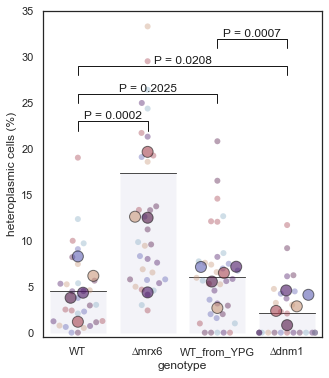

In [52]:
#sns.set_theme(style="white", font_scale=1.1, context="talk")

u = sns.color_palette('twilight_r',6)

plt.figure(figsize=(5, 6))

sns.swarmplot(x='genotype', y='heteroplasmy_ratio', hue='rep_exp', palette=u, alpha=0.4, size=6, data=all_new_df_)

# Box plot
sns.boxplot(x='genotype', y='heteroplasmy_ratio', data=d_, linewidth=1) 

# Annotation for statistical significance
for i, j in enumerate(['∆mrx6',  'WT_from_YPG','∆dnm1']):
    x1, x2, y, h = 0, 1+i, 22+i*3, 1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
    plt.text((x1+x2)*.5, y+h*1, "P = " + get_pvalue(f_, j), ha='center', va='bottom', color='k')

for i, j in enumerate(['∆dnm1']):
    x1, x2, y, h = 3, 2+i, 31+i*3, 1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
    plt.text((x1+x2)*.5, y+h*1, "P = " + get_pvalue2(f_, j), ha='center', va='bottom', color='k')

sns.swarmplot(x='genotype', y='heteroplasmy_ratio', hue='replicate',palette=u, data = c, size=11, edgecolor='k', linewidth=1, alpha = 0.6)
    
# Plot mean as a barplot 
hetero_ = d_['heteroplasmy_ratio']
sns.barplot(x='genotype', y=hetero_, data=d_, color='#878bcd', alpha=0.1)
sns.set(style="white")
plt.legend().remove()
plt.ylabel('heteroplasmic cells (%)')
plt.ylim(-0.5,35) 

plt.savefig('18hrs_heteroplasmic_cells_mrx6_dnm1_wt_ypg.svg', transparent = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


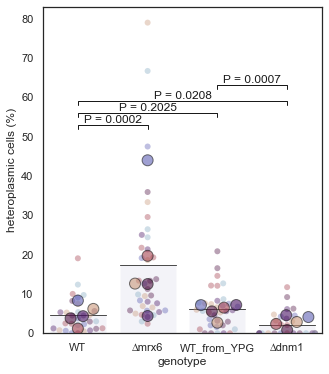

In [53]:
#sns.set_theme(style="white", font_scale=1.1, context="talk")

u = sns.color_palette('twilight_r',6)

plt.figure(figsize=(5, 6))

sns.swarmplot(x='genotype', y='heteroplasmy_ratio', hue='rep_exp', palette=u, alpha=0.4, size=6, data=all_new_df_)

# Box plot
sns.boxplot(x='genotype', y='heteroplasmy_ratio', data=d_, linewidth=1) 

# Annotation for statistical significance
for i, j in enumerate(['∆mrx6', 'WT_from_YPG','∆dnm1']):
    x1, x2, y, h = 0, 1+i, 52+i*3, 1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
    plt.text((x1+x2)*.5, y+h*1, "P = " + get_pvalue(f_, j), ha='center', va='bottom', color='k')

for i, j in enumerate(['∆dnm1']):
    x1, x2, y, h = 3, 2+i, 62+i*3, 1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
    plt.text((x1+x2)*.5, y+h*1, "P = " + get_pvalue2(f_, j), ha='center', va='bottom', color='k')

sns.swarmplot(x='genotype', y='heteroplasmy_ratio', hue='replicate',palette=u, data = c, size=11, edgecolor='k', linewidth=1, alpha = 0.6)
    
# Plot mean as a barplot 
hetero_ = d_['heteroplasmy_ratio']
sns.barplot(x='genotype', y=hetero_, data=d_, color='#878bcd', alpha=0.1)
sns.set(style="white")
plt.legend().remove()
plt.ylabel('heteroplasmic cells (%)')
#plt.ylim(-0.5,35) 

plt.savefig('18hrs_heteroplasmic_cells_mrx6_dnm1_wt_ypg_noylim.svg', transparent = True)

In [44]:
grouped = all_new_df_.groupby('genotype')

total_counts = grouped['rep_exp'].count()

het_zero_counts = grouped.apply(lambda x: (x['heteroplasmy_ratio'] == 0.0).sum())

# Calculate the fraction or percentage
fraction = het_zero_counts / total_counts
percentage = fraction * 100

only_homo_df = pd.DataFrame({
    'total_rep_exp': total_counts,
    'rep_exp_het0': het_zero_counts,
    'fraction': fraction,
    'percentage': percentage
})

In [45]:
only_homo_df

,total_rep_exp,rep_exp_het0,fraction,percentage
genotype,,,,
WT,30,2,0.066667,6.666667
∆mrx6,37,0,0.000000,0.000000
WT_from_YPG,35,5,0.142857,14.285714
∆dnm1,28,16,0.571429,57.142857


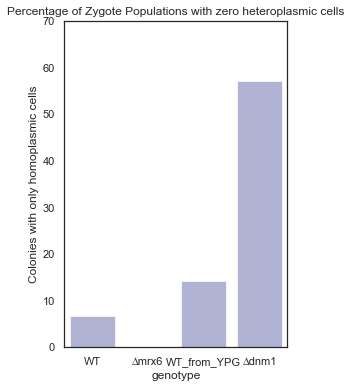

In [54]:
plt.figure(figsize=(4, 6))

sns.barplot(x=only_homo_df.index, y='percentage', data=only_homo_df, color='#878bcd', alpha=0.7)

plt.title('Percentage of Zygote Populations with zero heteroplasmic cells')
plt.ylabel('Colonies with only homoplasmic cells')
plt.ylim(0,70)
plt.savefig('percentage_noheterocells_wt_mrx6_dnm1_ypg_barplot.svg', transparent = True)